In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")



In [4]:
# Display the first few rows of each dataset
print("Customers:\n", customers.head())
print("\nProducts:\n", products.head())
print("\nTransactions:\n", transactions.head())



Customers:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2

In [5]:
# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())




Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')





Revenue per Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-7-e24e58bc5d04>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="viridis")


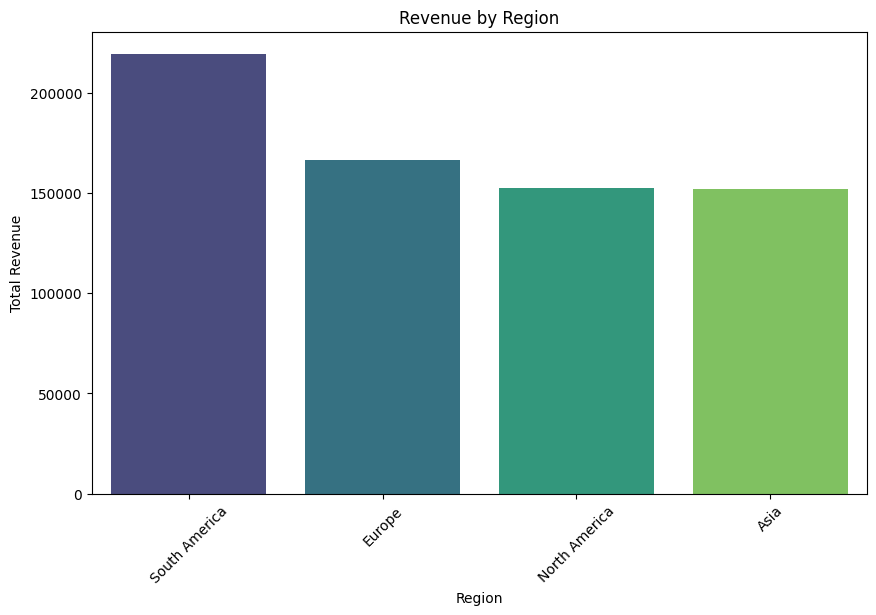

In [7]:
# EDA: Revenue per region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue per Region:\n", region_revenue)

# Visualization: Revenue by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="viridis")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()




Top 10 Products by Revenue:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


<ipython-input-8-787df7a50bb8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


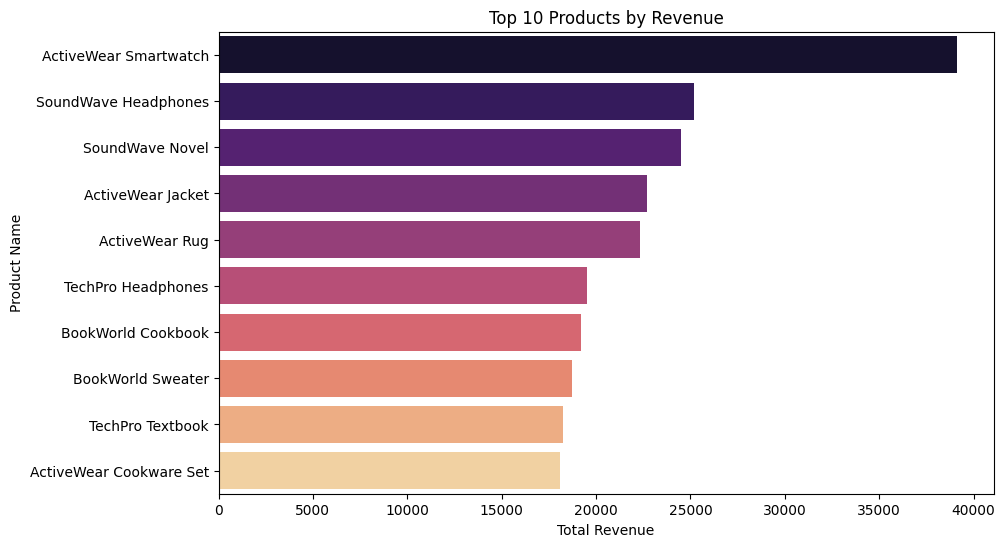

In [8]:
# EDA: Top products by revenue
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Revenue:\n", top_products)

# Visualization: Top Products by Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.show()




Signup Trends by Year:
 SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


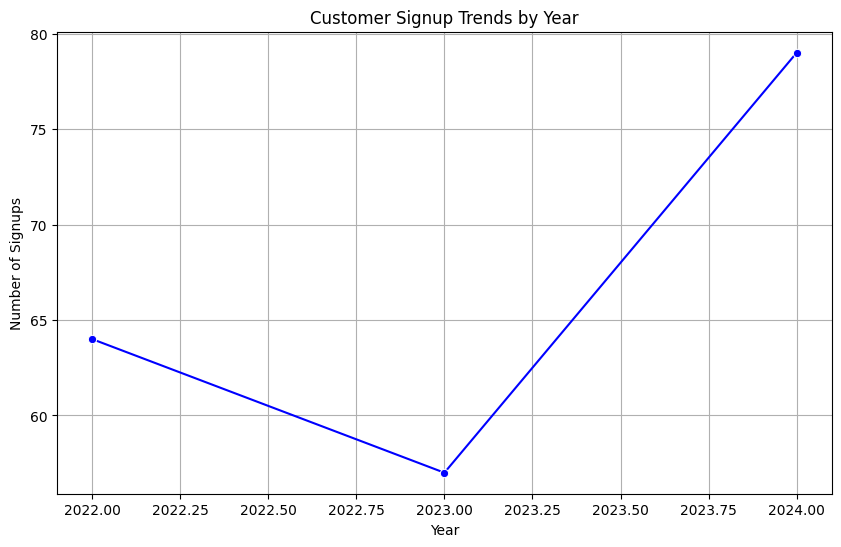

In [9]:
# EDA: Signup trends over time
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
print("\nSignup Trends by Year:\n", signup_trends)

# Visualization: Signup Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker='o', color='blue')
plt.title("Customer Signup Trends by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()




Transactions by Month:
 TransactionDate
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: count, dtype: int64


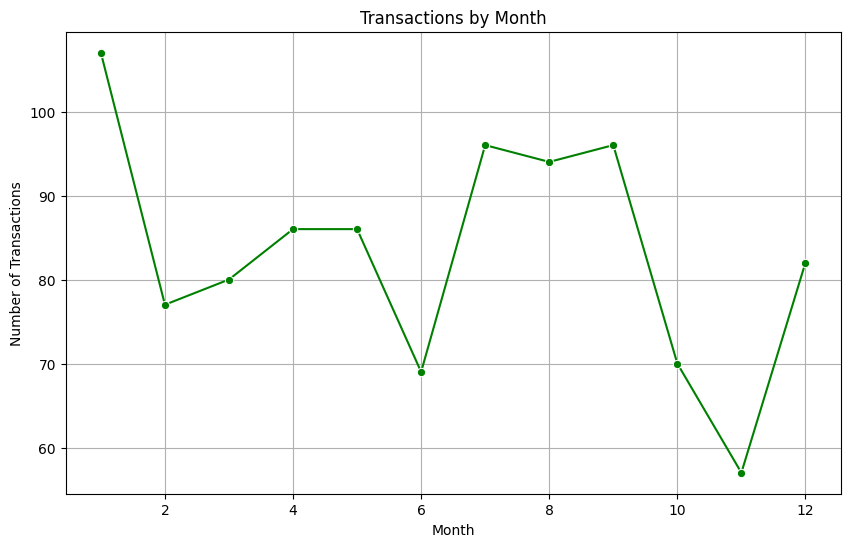

In [10]:
# EDA: Transactions over time (Monthly Trend)
transactions_over_time = merged_data['TransactionDate'].dt.month.value_counts().sort_index()
print("\nTransactions by Month:\n", transactions_over_time)

# Visualization: Transactions by Month
plt.figure(figsize=(10, 6))
sns.lineplot(x=transactions_over_time.index, y=transactions_over_time.values, marker='o', color='green')
plt.title("Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()




Revenue by Product Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


<ipython-input-11-cdd041309ee4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")


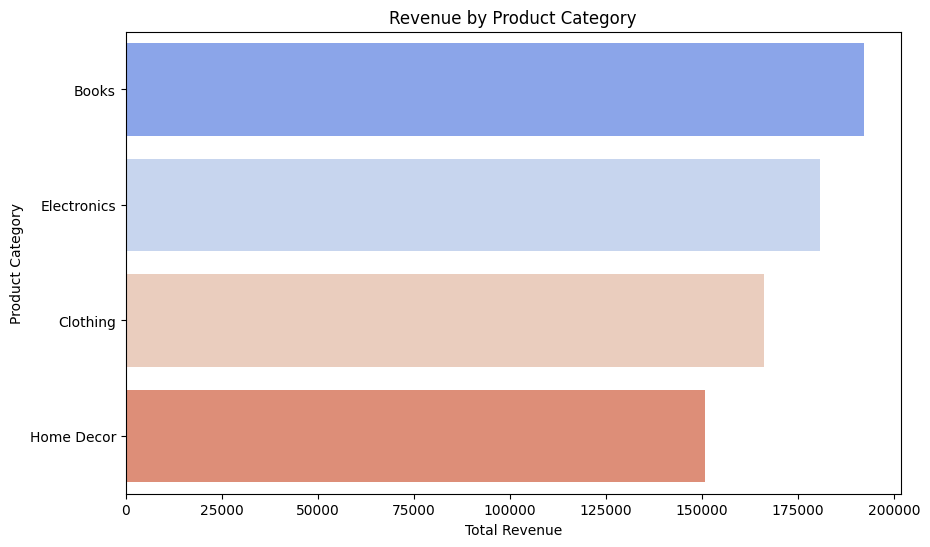

In [11]:
# EDA: Popular Product Categories
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:\n", category_revenue)

# Visualization: Revenue by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()




Average Spending per Transaction by Region:
 Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


<ipython-input-14-3359bd7a7266>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spending_region.values, y=avg_spending_region.index, palette="Blues_r")


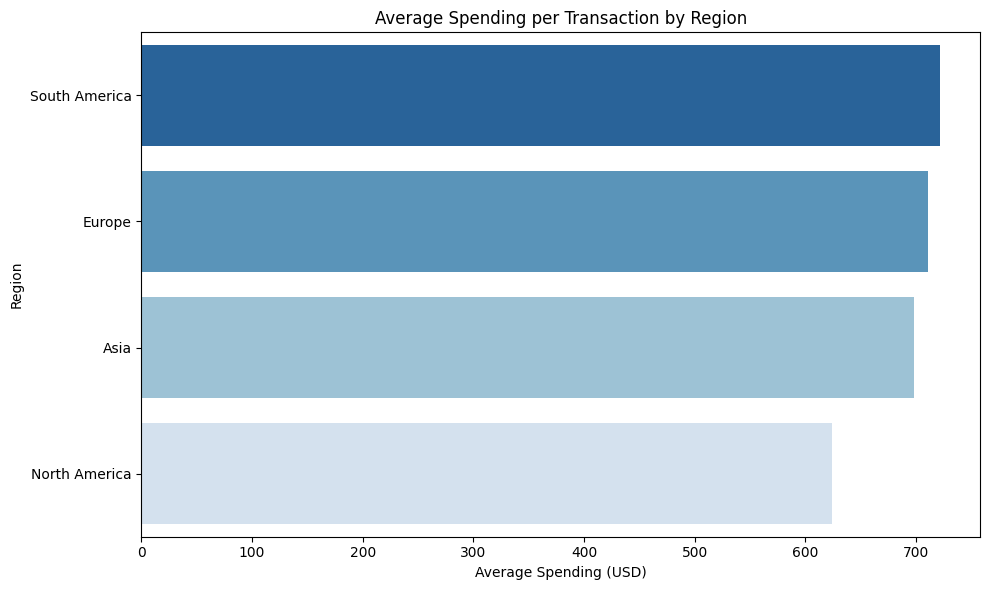

In [14]:
# EDA: Average Spending by Region
avg_spending_region = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print("\nAverage Spending per Transaction by Region:\n", avg_spending_region)

# Visualization: Average Spending per Transaction by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_spending_region.values, y=avg_spending_region.index, palette="Blues_r")
plt.title("Average Spending per Transaction by Region")
plt.xlabel("Average Spending (USD)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()




Top 5 Customers by Revenue:
 CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


<ipython-input-15-4a3af3f87c94>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="Greens_r")


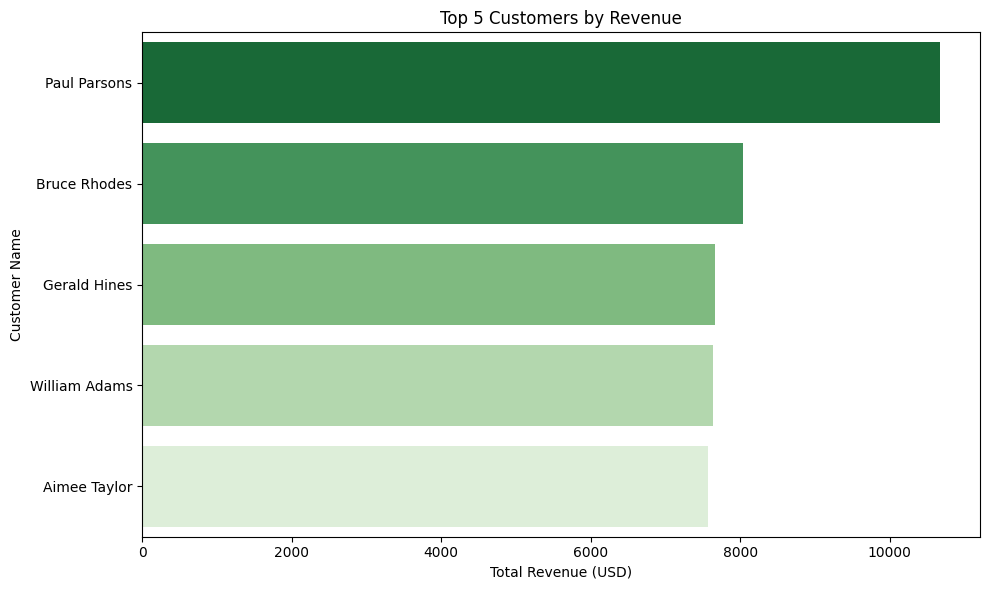

In [15]:
# EDA: Most Active Customers
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Revenue:\n", top_customers)

# Visualization: Top 5 Customers by Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="Greens_r")
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()